<a href="https://colab.research.google.com/github/DipankarJDutta/DipankarJDutta-Biomarker-discovery-from-B-T-cells-in-FASD-GDM-with-LSTM/blob/Peering-inside-the-Black-Box/LSTM_Input_Pearson_correlation_heatmap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Fixing random seed to 007 for reproducibility
from numpy.random import seed
seed(7)
from tensorflow import set_random_seed
set_random_seed(7)

In [0]:
# Importing essentials
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [0]:
# Load data
dataset = pd.read_csv('B-T-median_+col-names_-learner-type.csv')

In [14]:
# Display all data
dataset.head(56)

,Tnfaip3,Chchd7,Gnas,Pld4,Rasa1,Dapp1,Mtpap,Ttc3,Stk38,Ets1,Rars2,Wdr43,Bin1,Brox,Ddx50,Kdm7a,Mapk9,Ms4a6b,Zfp639,Celf2,Setdb2,2310001H17Rik,Umps,Tcrg-C4,Ptcd3,Ets1.1,Wac,Tvp23b,Usp15
0,0.361,0.723,0.802,1.000,1.000,0.904,0.285,0.827,0.867,0.527,1.000,0.627,1.000,0.456,1.000,0.393,0.658,0.468,0.197,1.000,0.675,1.000,0.659,0.148,0.743,0.638,0.956,0.379,0.833
1,0.692,0.676,0.686,1.000,0.720,0.903,0.255,0.833,0.780,0.515,1.000,0.283,0.586,0.516,0.788,0.581,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2,1.000,1.000,0.711,0.805,0.809,1.000,0.614,1.000,1.000,1.000,1.000,0.791,1.000,0.239,0.582,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
3,0.458,0.610,1.000,1.000,0.607,0.958,1.000,0.262,0.915,0.716,1.000,0.797,0.764,1.000,0.874,0.316,0.832,0.742,1.000,0.942,0.778,1.000,0.592,0.000,0.918,0.760,0.868,1.000,0.914
4,0.294,0.723,1.000,0.991,0.367,0.670,0.705,0.776,0.748,0.578,1.000,0.283,0.422,0.790,0.704,0.447,0.355,0.243,0.087,0.849,0.588,0.564,0.478,0.000,1.000,0.572,0.831,1.000,0.719
5,0.654,0.439,0.607,1.000,0.351,0.781,0.374,1.000,0.569,0.438,1.000,0.404,0.574,0.776,1.000,0.600,1.000,0.214,0.141,1.000,0.538,1.000,0.717,0.000,0.776,0.527,0.740,1.000,0.766
6,0.573,0.343,0.407,1.000,1.000,0.872,1.000,1.000,1.000,0.696,1.000,0.289,1.000,1.000,1.000,1.000,0.869,0.436,0.052,1.000,1.000,1.000,1.000,0.313,0.678,0.558,0.925,0.419,0.903
7,1.000,1.000,0.669,0.755,1.000,0.829,1.000,1.000,1.000,1.000,1.000,0.549,0.817,0.759,0.650,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
8,1.000,0.566,1.000,1.000,1.000,0.814,1.000,0.854,0.824,0.729,1.000,0.490,1.000,0.557,0.885,0.787,1.000,0.513,0.247,1.000,0.599,0.712,0.679,0.000,0.767,0.695,0.718,1.000,0.882
9,1.000,0.378,1.000,1.000,0.377,0.881,0.249,0.318,0.757,0.572,1.000,0.404,0.725,1.000,1.000,0.298,0.832,0.493,0.131,0.974,1.000,1.000,0.243,0.000,0.576,0.547,1.000,0.213,0.570


In [15]:
# Describe the data; 56 samples, range of 0 to 1 (not z-scored)
dataset.describe()

,Tnfaip3,Chchd7,Gnas,Pld4,Rasa1,Dapp1,Mtpap,Ttc3,Stk38,Ets1,Rars2,Wdr43,Bin1,Brox,Ddx50,Kdm7a,Mapk9,Ms4a6b,Zfp639,Celf2,Setdb2,2310001H17Rik,Umps,Tcrg-C4,Ptcd3,Ets1.1,Wac,Tvp23b,Usp15
count,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000
mean,0.745054,0.662339,0.646339,0.880018,0.795964,0.852411,0.785518,0.816446,0.839393,0.780054,0.825911,0.716411,0.782857,0.761268,0.833750,0.689214,0.747982,0.528018,0.491875,0.799339,0.638643,0.667286,0.629929,0.149786,0.749911,0.702321,0.735750,0.744232,0.740643
std,0.331375,0.251074,0.348948,0.223891,0.271570,0.234889,0.299548,0.261419,0.233316,0.249634,0.264720,0.307765,0.278606,0.276906,0.242888,0.311914,0.345266,0.381622,0.449976,0.342089,0.369270,0.373938,0.320031,0.239348,0.344487,0.325165,0.327935,0.375065,0.327794
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.511250,0.543750,0.370500,0.864750,0.710750,0.811750,0.614000,0.744500,0.810750,0.650500,0.715000,0.508000,0.677250,0.609000,0.743750,0.471750,0.658000,0.176750,0.095250,0.795250,0.393000,0.414000,0.521750,0.000000,0.659250,0.570500,0.716250,0.680500,0.747750
50%,1.000000,0.713500,0.698500,0.941500,0.878000,0.927000,0.938000,0.900500,0.899000,0.872000,1.000000,0.830500,0.902000,0.803000,0.911000,0.712500,0.883500,0.523000,0.219000,0.945000,0.642000,0.816500,0.702500,0.000000,0.918500,0.823000,0.833000,1.000000,0.869000
75%,1.000000,0.824000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.960250,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.882750,0.343000,1.000000,0.955500,1.000000,1.000000,0.941750
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [0]:
# Set Seaborn Style defaults
sns.set(style = 'ticks', font= 'sans-serif', font_scale=1.25)

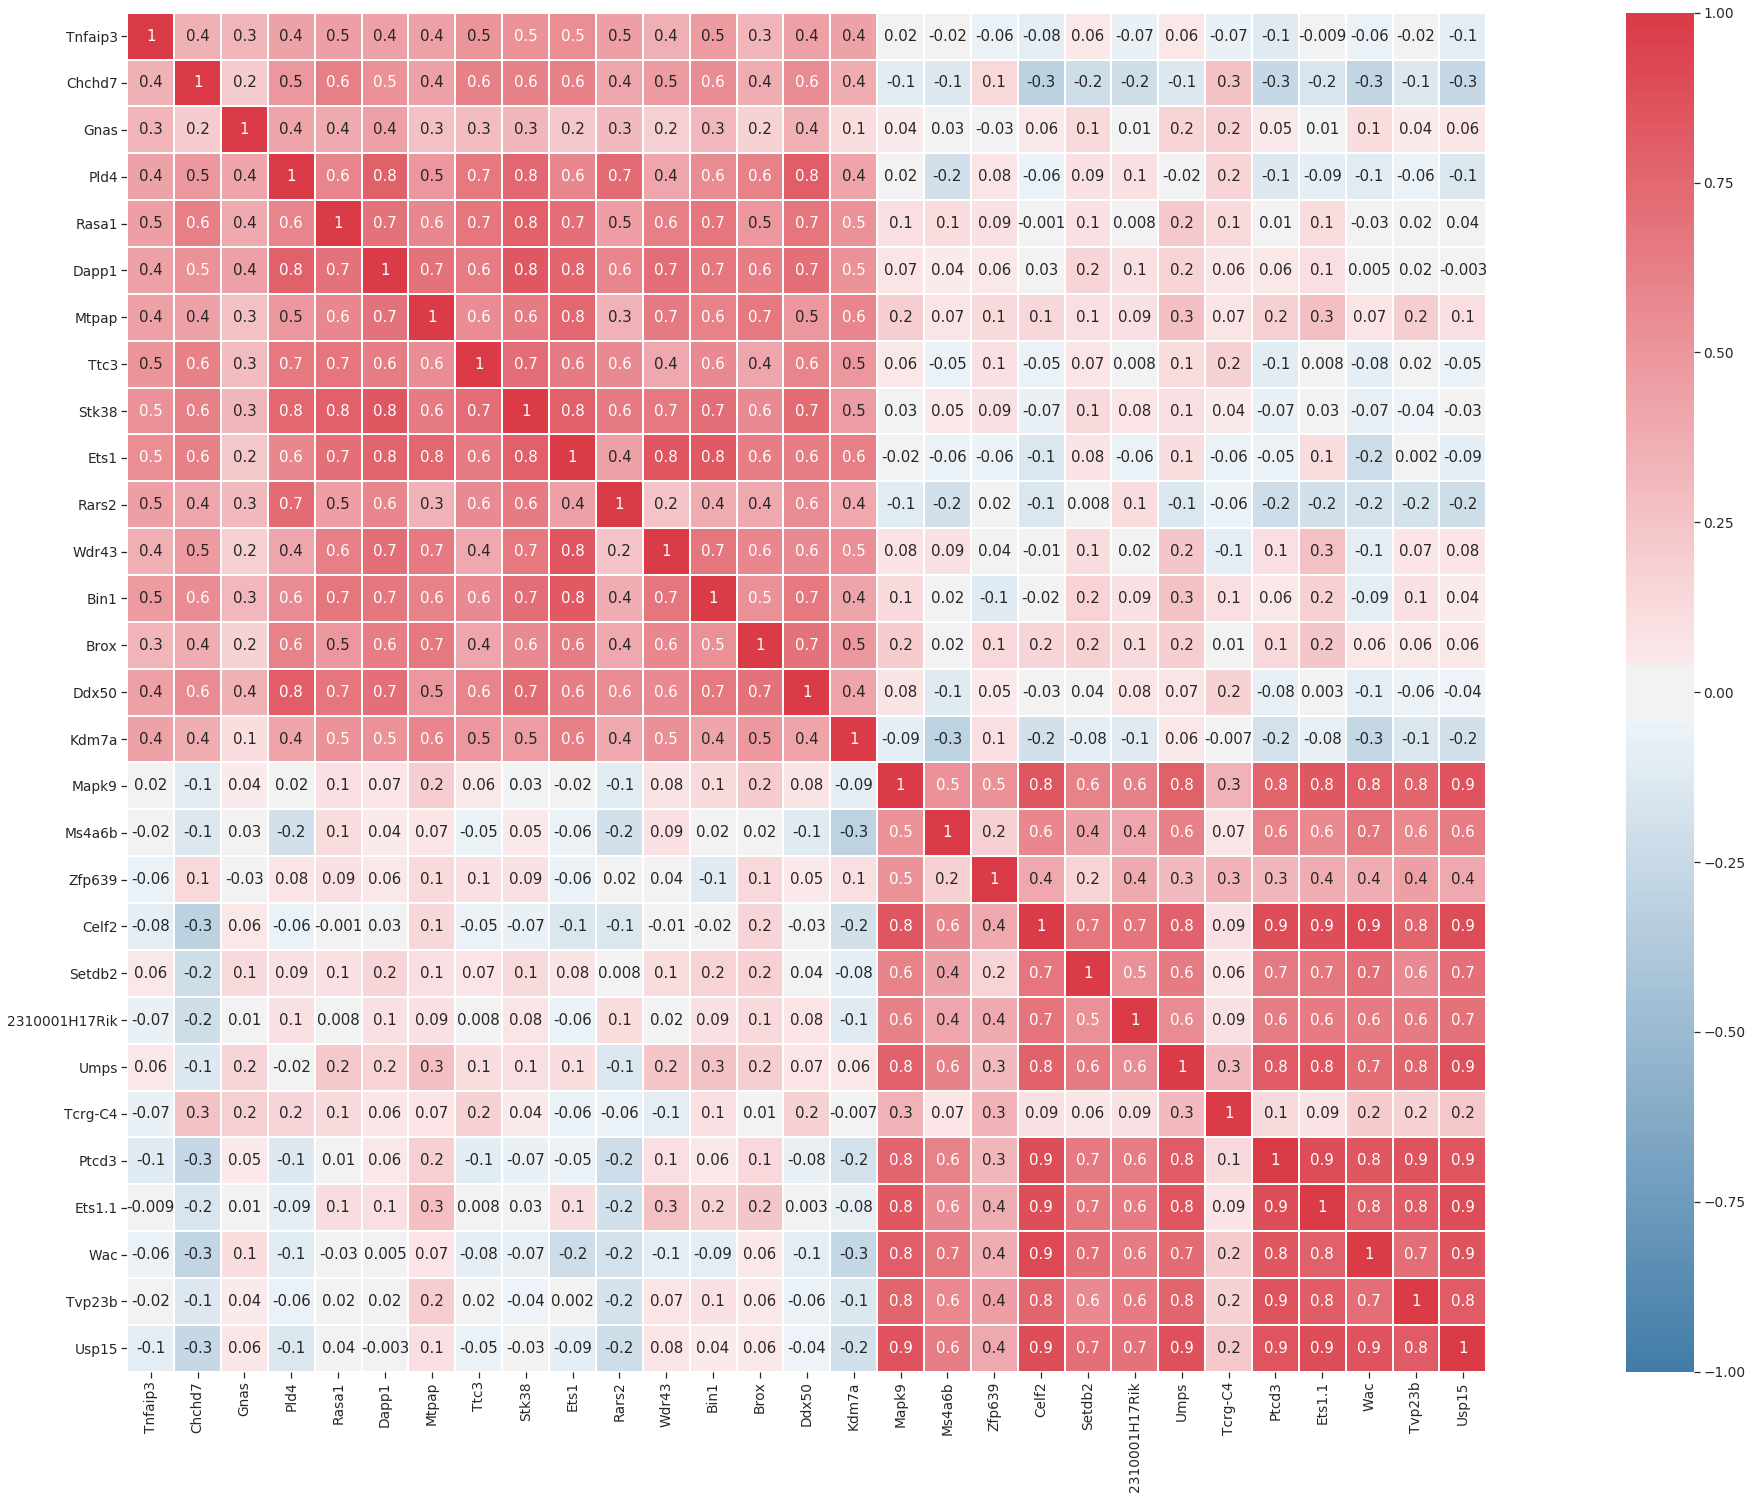

In [17]:
# Pearson Correlation of columns
corr = dataset.corr(method='pearson')

#Set up Matplotlib figure
f,ax = plt.subplots(figsize=(50,25))

# Mask the mirror image across the diagonal
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Specify colors
cmap = sns.diverging_palette(240, 10, as_cmap=True)

# Plotting the heatmap without the mask, correct aspect ratio and the etire range of Pearson's correlation (-1 to +1)
sns.heatmap(corr, linewidths=1, linecolor = 'white', cmap=cmap, center=0, vmax=1, vmin=-1, square=True, cbar_kws={'shrink':1}, annot = True, fmt='0.1g' )

#Save figure as svg
plt.savefig ('pearson-correlation_columns_B-T_median.svg', format = 'svg')

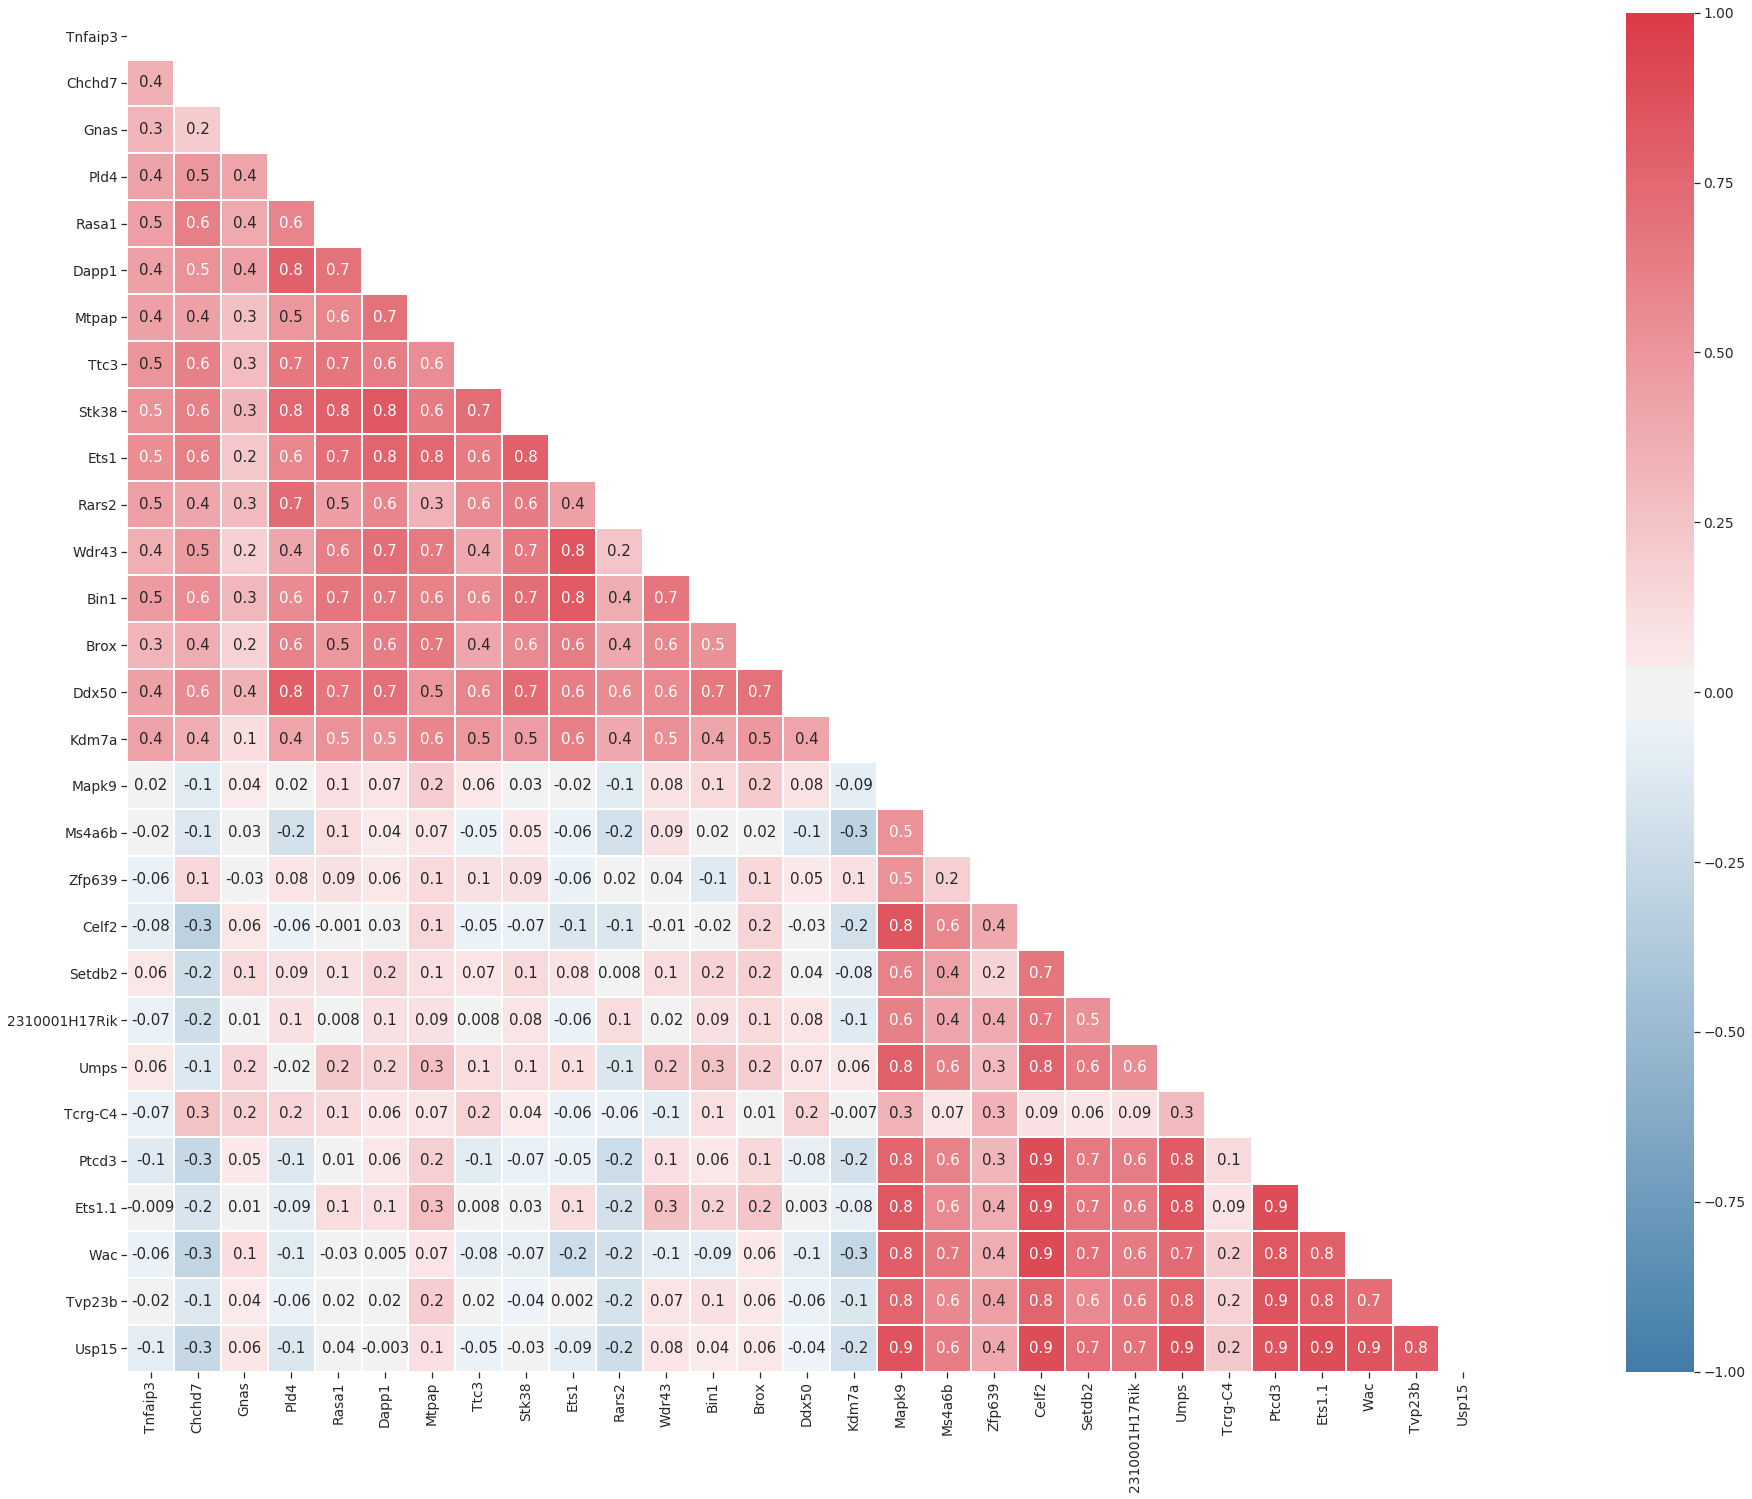

In [18]:
# Plotting the half-diagonal heatmap (with mask)
f,ax = plt.subplots(figsize=(50,25))
sns.heatmap(corr, linewidths=1, linecolor = 'white', mask=mask, cmap=cmap, center=0, vmax=1, vmin=-1, square=True, cbar_kws={'shrink':1}, annot = True, fmt='0.1g')

#Save figure as svg
plt.savefig ('pearson-correlation_columns_B-T_median_half diagonal.svg', format = 'svg')

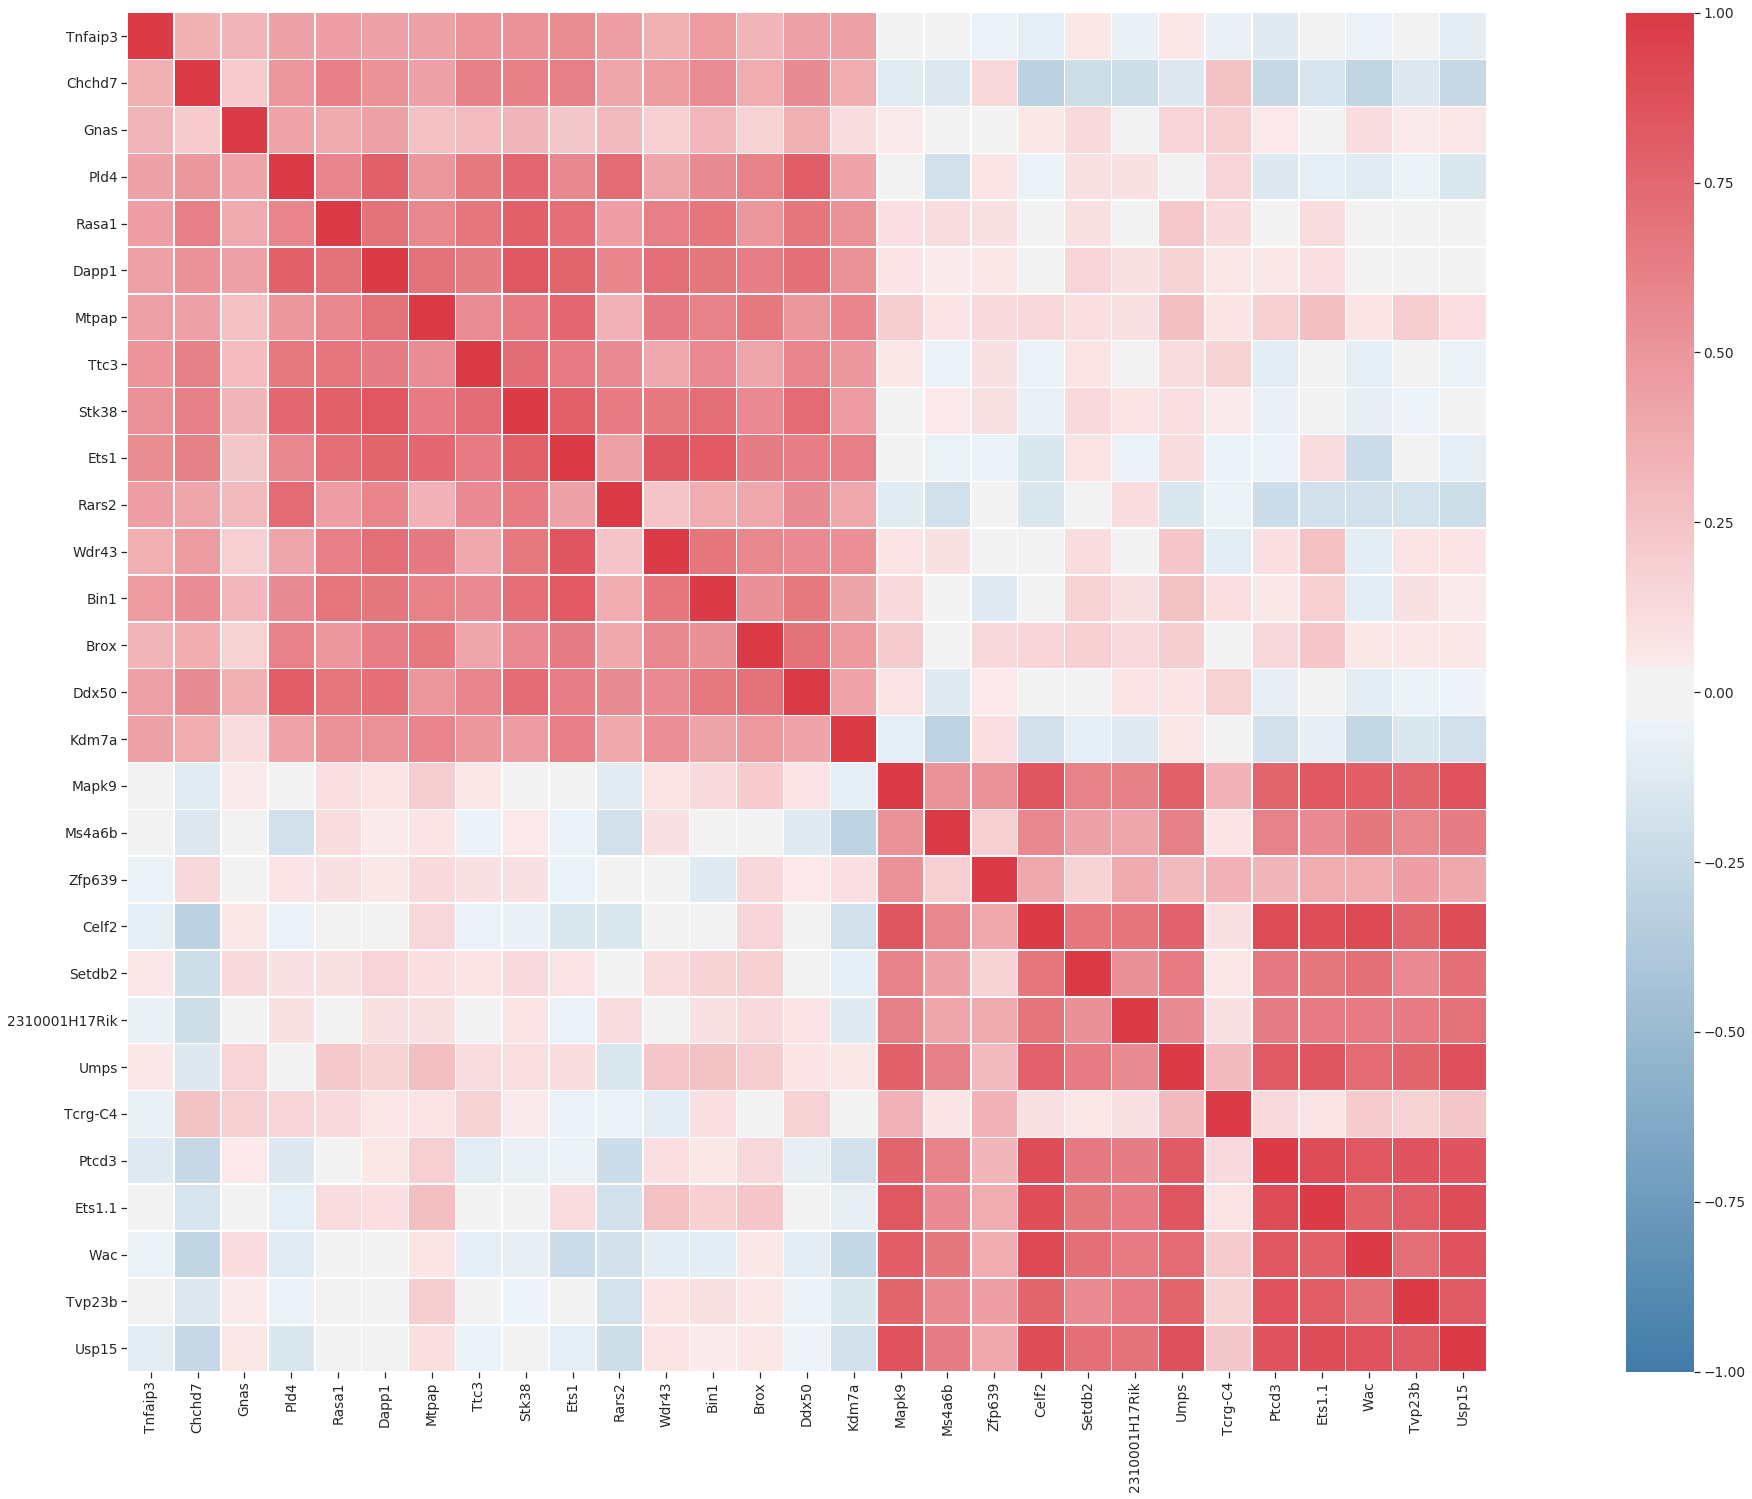

In [19]:
#No annotations inside cells

#Set up Matplotlib figure
f,ax = plt.subplots(figsize=(50,25))

# Mask the mirror image across the diagonal
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Specify colors
cmap = sns.diverging_palette(240, 10, as_cmap=True)

# Plotting the heatmap without the mask, correct aspect ratio and the etire range of Pearson's correlation (-1 to +1)
sns.heatmap(corr, linewidths=0.5, linecolor = 'white', cmap=cmap, center=0, vmax=1, vmin=-1, square=True, cbar_kws={'shrink':1})

#Save figure as svg
plt.savefig ('pearson-correlation_columns_B-T_median_no annot.svg', format = 'svg')

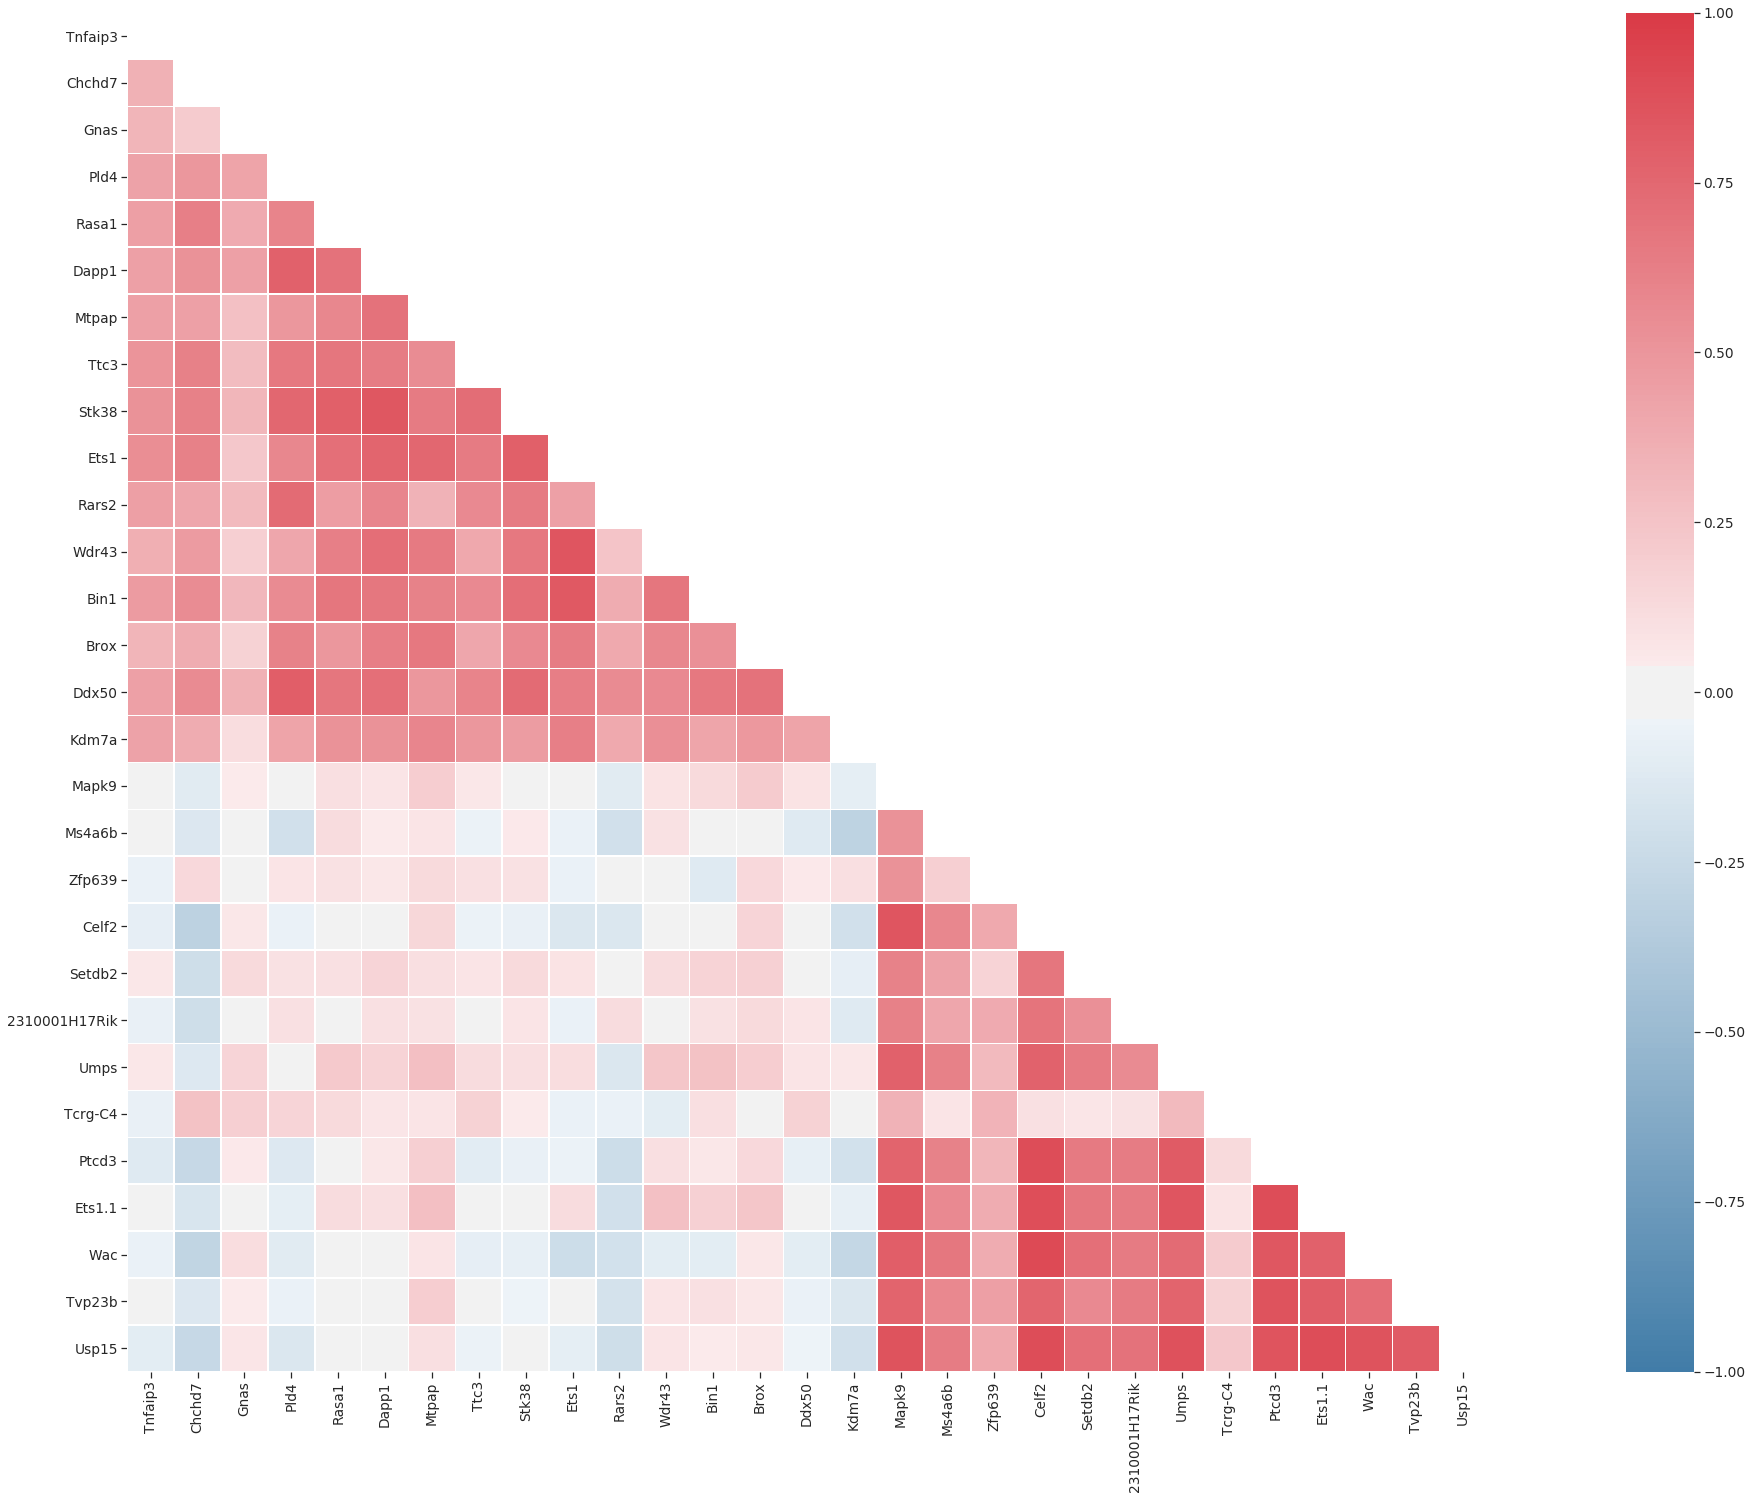

In [20]:
# Plotting the half-diagonal heatmap (with mask & no annotations))
f,ax = plt.subplots(figsize=(50,25))
sns.heatmap(corr, linewidths=0.5, mask=mask, cmap=cmap, center=0, vmax=1, vmin=-1, square=True, cbar_kws={'shrink':1})

#Save figure as svg
plt.savefig ('pearson-correlation_columns_B-T_median_half-diagonal_no annot.svg', format = 'svg')